In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# !pip install -q ISLP
import ISLP
from ISLP.models import summarize
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [34]:
advertising_df = pd.read_csv("../../data/Advertising.csv", index_col=0)
advertising_df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## First, a small note from last week's class

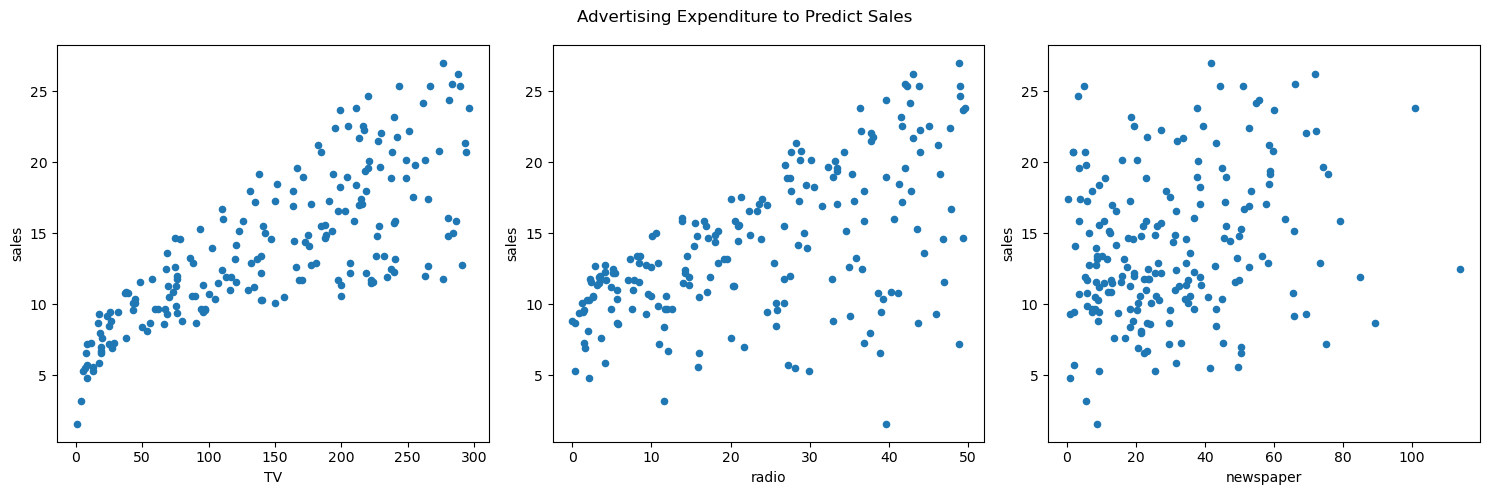

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for (i, col) in enumerate(['TV', 'radio', 'newspaper']):
    advertising_df.plot.scatter(x=col, y='sales', ax=ax[i])
fig.suptitle('Advertising Expenditure to Predict Sales')
plt.tight_layout()

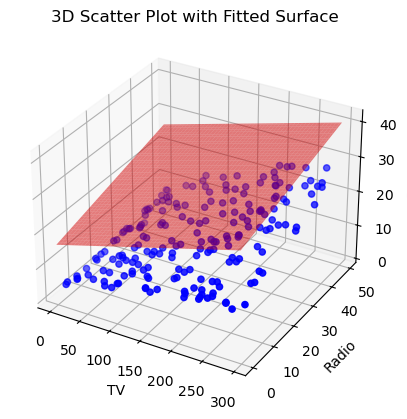

In [36]:
# Extracting the data
x = advertising_df['TV']
y = advertising_df['radio']
z = advertising_df['sales']

# Creating the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')

# Fitting a surface
# Create a meshgrid for the surface plot
x_surf, y_surf = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
# Fit a polynomial surface
z_surf = np.polyval(np.polyfit(x, z, 1), x_surf) + np.polyval(np.polyfit(y, z, 1), y_surf)

# Plot the surface
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

# Labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter Plot with Fitted Surface')

# Show the plot
plt.show()

In [37]:
advertising_df['intercept'] = 1
model = sm.OLS(advertising_df['sales'], advertising_df[['intercept', 'TV', 'radio', 'newspaper']])
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,2.9389,0.312,9.422,0.00
TV,0.0458,0.001,32.809,0.00
radio,0.1885,0.009,21.893,0.00
newspaper,-0.0010,0.006,-0.177,0.86


In [40]:
advertising_df['TV*radio'] = advertising_df['TV'] * advertising_df['radio']
model = sm.OLS(advertising_df['sales'], advertising_df[['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']])
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,6.7284,0.253000,26.561,0.000
TV,0.0191,0.002000,12.633,0.000
radio,0.0280,0.009000,3.062,0.003
newspaper,0.0014,0.003000,0.438,0.662
TV*radio,0.0011,0.000053,20.686,0.000


## Let's create a test set

In [41]:
# Define the test size
test_size = 0.1

# Perform the train-test split
train_df, test_df = train_test_split(advertising_df, test_size=test_size, random_state=42)

# Display the test DataFrame
test_df

,TV,radio,newspaper,sales,intercept,TV*Radio,TV*radio
96,163.3,31.6,52.9,16.9,1,5160.28,5160.28
16,195.4,47.7,52.9,22.4,1,9320.58,9320.58
31,292.9,28.3,43.2,21.4,1,8289.07,8289.07
159,11.7,36.9,45.2,7.3,1,431.73,431.73
129,220.3,49.0,3.2,24.7,1,10794.70,10794.70
116,75.1,35.0,52.7,12.6,1,2628.50,2628.50
70,216.8,43.9,27.2,22.3,1,9517.52,9517.52
171,50.0,11.6,18.4,8.4,1,580.00,580.00
175,222.4,3.4,13.1,11.5,1,756.16,756.16
46,175.1,22.5,31.5,14.9,1,3939.75,3939.75


## Calculate MSE with different models

In [43]:
def get_train_test_mse_predictions(y_var, xvars, train_df, test_df):
    model = sm.OLS(train_df[y_var], train_df[xvars])
    model_fit = model.fit()
    train_y_hat = model_fit.predict(train_df[xvars])
    test_y_hat = model_fit.predict(test_df[xvars])
    train_mse = ((train_df[y_var] - train_y_hat)**2).mean()
    test_mse = ((test_df[y_var] - test_y_hat)**2).mean()

    print(xvars)
    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)
    print()
    return test_y_hat


y_var = 'sales'
x_vars_1 = ['intercept', 'TV', 'radio', 'newspaper']
x_vars_2 = ['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']

test_y_hat_1 = get_train_test_mse_predictions(y_var, x_vars_1, train_df, test_df)
test_y_hat_2 = get_train_test_mse_predictions(y_var, x_vars_2, train_df, test_df)

['intercept', 'TV', 'radio', 'newspaper']
Train MSE: 2.7543155639500685
Test MSE: 3.1308020912380448

['intercept', 'TV', 'radio', 'newspaper', 'TV*radio']
Train MSE: 0.8661112504818059
Test MSE: 0.951547109426838

